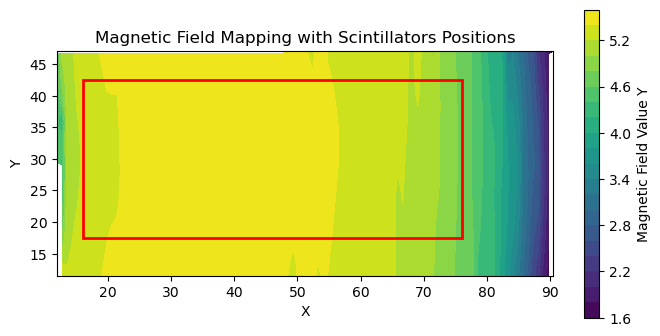

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import glob  # Per leggere più file automaticamente

# 1️⃣ Caricare e unire i file
file_list = ["../Data/CampoMagnetico/Centrale1.txt", "../Data/CampoMagnetico/Sinistra1.txt", "../Data/CampoMagnetico/Destra1.txt",
                "../Data/CampoMagnetico/Centrale2.txt", "../Data/CampoMagnetico/Sinistra1.txt", "../Data/CampoMagnetico/Destra2.txt",
                "../Data/CampoMagnetico/Centrale3.txt", "../Data/CampoMagnetico/Sinistra3.txt", "../Data/CampoMagnetico/Destra3.txt"]  # Sostituisci con i nomi dei tuoi file
data_list = [np.loadtxt(f, delimiter="\t") for f in file_list]  # Carica ogni file

# Unisce i dati in un unico array
data = np.vstack(data_list)  # Stack verticale per unire le righe

# 2️⃣ Estrarre colonne X, Y e campo Z
y, x, z = data[:, 2], (data[:, 1]-0.185)*(89.9-12.5)/(0.950-0.185)+12.5, data[:, 0]

# 3️⃣ Creare una griglia regolare
xi = np.linspace(min(x), max(x), 100)  # 100 punti in X
yi = np.linspace(min(y), max(y), 100)  # 100 punti in Y
X, Y = np.meshgrid(xi, yi)  # Griglia 2D

# 4️⃣ Interpolare i valori su tutta la griglia
Z = griddata((x, y), z, (X, Y), method='cubic')  # 'cubic' per interpolazione liscia


# Create the contour plot (without points)
plt.figure(figsize=(8, 4))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')  # Filled contour
plt.colorbar(contour, label="Magnetic Field Value Y")  

plt.gca().set_aspect("equal", adjustable="box")  # Maintain equal aspect ratio
plt.xlim(min(x), max(x))  # Limit X to data range
plt.ylim(min(y), max(y))  # Limit Y to data range

# ✅ Add a Rectangle to Mark the Object
object_y = 17.5  # X position (bottom-left corner)
object_x = 16.0  # Y position (bottom-left corner)
object_width = 60 # Width of the rectangle
object_height = 25.0  # Height of the rectangle


rectangle = plt.Rectangle(
    (object_x, object_y), object_width, object_height, 
    fill=False, edgecolor="red", linewidth=2  # Hollow with red border
)

plt.gca().add_patch(rectangle)  # Add the rectangle to the plot

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Magnetic Field Mapping with Scintillators Positions")


plt.show()
